# Approach 2: Neural Networks (Multi-Layer Perceptron)

## Objective: Utilize Predictive Analytics to Improve Customer Engagement by Evaluating Movie Preferences through Customer Likes and Dislikes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

## Step 2: Building the MLP Model

### 2.1. Loading the Data

In [2]:
# Loading the preprocessed data from the CSV files created during the 'IS4242 NN Preprocessing' stage
ua_train = pd.read_csv("ua_train.csv", encoding = 'iso-8859-1',na_values = ['NaN', ''], infer_datetime_format = True)
ua_test = pd.read_csv("ua_test.csv", encoding = 'iso-8859-1',na_values = ['NaN', ''], infer_datetime_format = True)

Inspecting the structure of ua_train 

In [3]:
ua_train.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,occupation_student,occupation_technician,occupation_writer,release_year_1940-1949,release_year_1950-1959,release_year_1960-1969,release_year_1970-1979,release_year_1980-1989,release_year_1990-1999,release_year_before 1940
0,0,0,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


Inspecting the structure of ua_test 

In [4]:
ua_test.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,occupation_student,occupation_technician,occupation_writer,release_year_1940-1949,release_year_1950-1959,release_year_1960-1969,release_year_1970-1979,release_year_1980-1989,release_year_1990-1999,release_year_before 1940
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### 2.2. Data Splitting:

Create a binary target variable 'like' where 1 represents "Like" and 0 represents "Dislike"

In [5]:
# Create a binary target variable 'like' where 1 represents "Like" and 0 represents "Dislike"
ua_train['like'] = (ua_train['rating'] >= 4).astype(int)
ua_test['like'] = (ua_test['rating'] >= 4).astype(int)

Count plot for like for ua_train

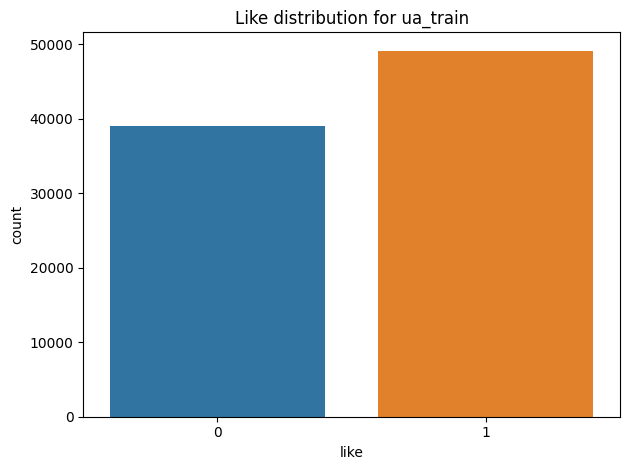

In [6]:
sns.countplot(data=ua_train, x='like')
plt.title('Like distribution for ua_train')
plt.tight_layout()
plt.show()

Count plot for like for ua_test

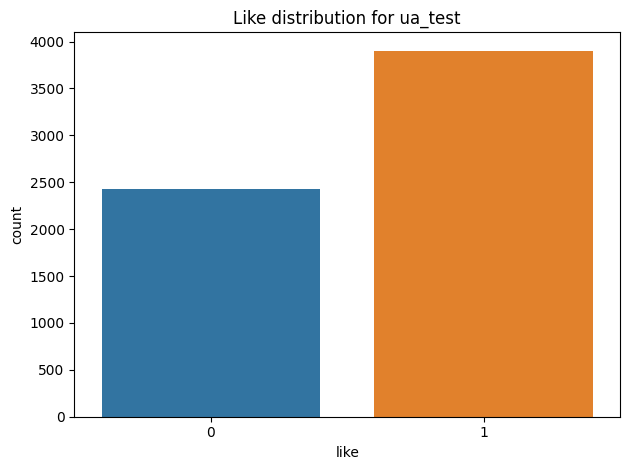

In [7]:
sns.countplot(data=ua_test, x='like')
plt.title('Like distribution for ua_test')
plt.tight_layout()
plt.show()

Excluding the rating column to form the input data for the model

In [8]:
ua_train.drop('rating', axis=1, inplace=True)
ua_test.drop('rating', axis=1, inplace=True)

Splitting the data into features (x) and the binary target variable (y)

In [9]:
# Split your data into features (x) and the binary target variable (y)
X_train = ua_train.drop('like', axis=1)
y_train = ua_train['like']
X_test = ua_test.drop('like', axis=1)
y_test = ua_test['like']

### 2.3. Modeling:

Standardize the data

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initialize an MLPClassifier with specific default settings

In [11]:
# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', learning_rate_init=0.001, max_iter=1000, batch_size=64)

Train the MLP classifier using the training data (X_train and y_train)

In [12]:
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=(16,), max_iter=1000)

Predict ratings for the test data using the trained MLP classifier

In [13]:
y_pred = mlp.predict(X_test)

### 2.4. Initial Model Evaluation:

Evaluating the accuracy of the MLP classifier on the test data

In [14]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6320858992578556


Evaluating the precision of the MLP classifier on the test data

In [15]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6839766081871345


Evaluating the recall of the MLP classifier on the test data

In [16]:
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.74916730719959


Evaluating the F1-score of the MLP classifier on the test data

In [17]:
# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.7150892638786989


Evaluating the AUC-ROC score of the MLP classifier on the test data

In [18]:
# AUC-ROC
y_prob = mlp.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)


AUC-ROC: 0.6378621910548918


Plotting the ROC curve for the MLP classifier

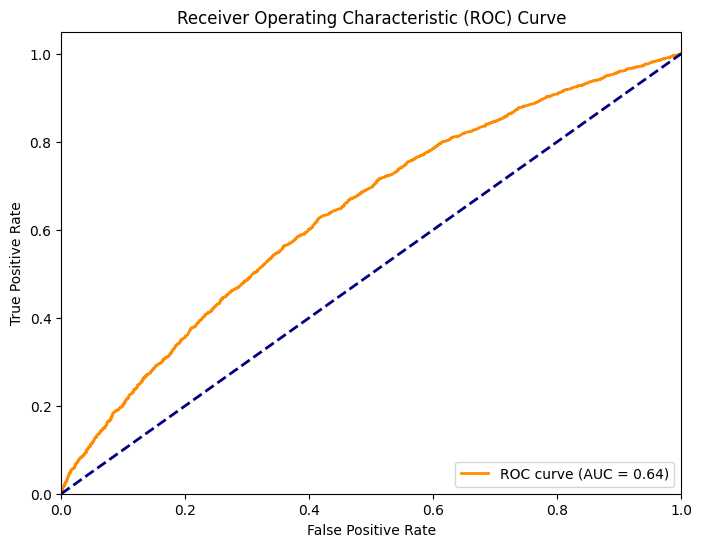

In [19]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Evaluating classification metrics with varying thresholds for the MLP classifier

In [20]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_thresholded)
    precision = precision_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)
    f1 = f1_score(y_test, y_pred_thresholded)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Threshold: {threshold:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {roc_auc:.2f}")
    print()


Threshold: 0.10
Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1-Score: 0.76
AUC-ROC: 0.64

Threshold: 0.20
Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1-Score: 0.76
AUC-ROC: 0.64

Threshold: 0.30
Accuracy: 0.62
Precision: 0.62
Recall: 0.97
F1-Score: 0.76
AUC-ROC: 0.64

Threshold: 0.40
Accuracy: 0.64
Precision: 0.65
Recall: 0.90
F1-Score: 0.75
AUC-ROC: 0.64

Threshold: 0.50
Accuracy: 0.63
Precision: 0.68
Recall: 0.75
F1-Score: 0.72
AUC-ROC: 0.64

Threshold: 0.60
Accuracy: 0.58
Precision: 0.72
Recall: 0.51
F1-Score: 0.60
AUC-ROC: 0.64

Threshold: 0.70
Accuracy: 0.50
Precision: 0.76
Recall: 0.27
F1-Score: 0.39
AUC-ROC: 0.64

Threshold: 0.80
Accuracy: 0.43
Precision: 0.79
Recall: 0.10
F1-Score: 0.17
AUC-ROC: 0.64

Threshold: 0.90
Accuracy: 0.39
Precision: 0.86
Recall: 0.02
F1-Score: 0.03
AUC-ROC: 0.64



Calculating Lift Values and Cumulative Lift Values for the MLP classifier

In [21]:
lift_values = []
cumulative_lift_values = []

for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    tp = sum((y_test == 1) & (y_pred_thresholded == 1))
    overall_positive_rate = sum(y_test == 1) / len(y_test)
    tpr = tp / (sum(y_test == 1))
    lift = tpr / overall_positive_rate
    cumulative_lift = (sum(y_test == 1) / len(y_test)) / overall_positive_rate

    lift_values.append(lift)
    cumulative_lift_values.append(cumulative_lift)
    
    print(f"Threshold: {threshold:.2f}")
    print(f"Lift Value: {lift:.2f}")
    print(f"Cumulative Lift Value: {cumulative_lift:.2f}")
    print()


Threshold: 0.10
Lift Value: 1.62
Cumulative Lift Value: 1.00

Threshold: 0.20
Lift Value: 1.62
Cumulative Lift Value: 1.00

Threshold: 0.30
Lift Value: 1.58
Cumulative Lift Value: 1.00

Threshold: 0.40
Lift Value: 1.46
Cumulative Lift Value: 1.00

Threshold: 0.50
Lift Value: 1.22
Cumulative Lift Value: 1.00

Threshold: 0.60
Lift Value: 0.82
Cumulative Lift Value: 1.00

Threshold: 0.70
Lift Value: 0.43
Cumulative Lift Value: 1.00

Threshold: 0.80
Lift Value: 0.16
Cumulative Lift Value: 1.00

Threshold: 0.90
Lift Value: 0.03
Cumulative Lift Value: 1.00



Computing Youden's Index for Different Thresholds for the MLP classifier

In [22]:
youden_values = []

for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    tp = sum((y_test == 1) & (y_pred_thresholded == 1))
    tn = sum((y_test == 0) & (y_pred_thresholded == 0))
    fp = sum((y_test == 0) & (y_pred_thresholded == 1))
    fn = sum((y_test == 1) & (y_pred_thresholded == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    youden_index = sensitivity + specificity - 1

    youden_values.append(youden_index)

    print(f"Threshold: {threshold:.2f}")
    print(f"Youden's Index: {youden_index:.2f}")
    print()


Threshold: 0.10
Youden's Index: 0.00

Threshold: 0.20
Youden's Index: 0.01

Threshold: 0.30
Youden's Index: 0.03

Threshold: 0.40
Youden's Index: 0.12

Threshold: 0.50
Youden's Index: 0.19

Threshold: 0.60
Youden's Index: 0.19

Threshold: 0.70
Youden's Index: 0.13

Threshold: 0.80
Youden's Index: 0.06

Threshold: 0.90
Youden's Index: 0.01



### 2.5. Hyperparameter Tuning:

Hyperparameter Tuning with GridSearchCV and K-Fold Cross-Validation

In [23]:
# Define hyperparameters for tuning
param_grid = {
    'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64), (32, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],  # Adjust the batch sizes as needed
}

# Use K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV with cross-validation for hyperparameter tuning
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=kf, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the randomized search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


Best parameters found through hyperparameter tuning 

In [24]:
print(best_params)

{'activation': 'logistic', 'batch_size': 32, 'hidden_layer_sizes': (16, 16), 'learning_rate_init': 0.001}


Fitting the best model found during hyperparameter tuning on the entire training dataset

In [25]:
# Fit the best model on the entire training dataset 
best_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', batch_size=32, hidden_layer_sizes=(16, 16),
              max_iter=1000)

Making predictions with the best model on the test data

In [26]:
y_pred = best_model.predict(X_test)

### 2.6. Evaluation Post Hyperparameter Tuning

Evaluating the accuracy of the tuned MLP classifier on the test data

In [27]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6317700931627981


Evaluating the precision of the tuned MLP classifier on the test data

In [28]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6885049196064315


Evaluating the recall of the tuned MLP classifier on the test data

In [29]:
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.7350755828849603


Evaluating the F1-score of the tuned MLP classifier on the test data

In [30]:
# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.7110285006195787


Evaluating the AUC-ROC score of the tuned MLP classifier on the test data

In [31]:
# AUC-ROC
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)


AUC-ROC: 0.6420314014016864


Plotting the ROC curve for the tuned MLP classifier

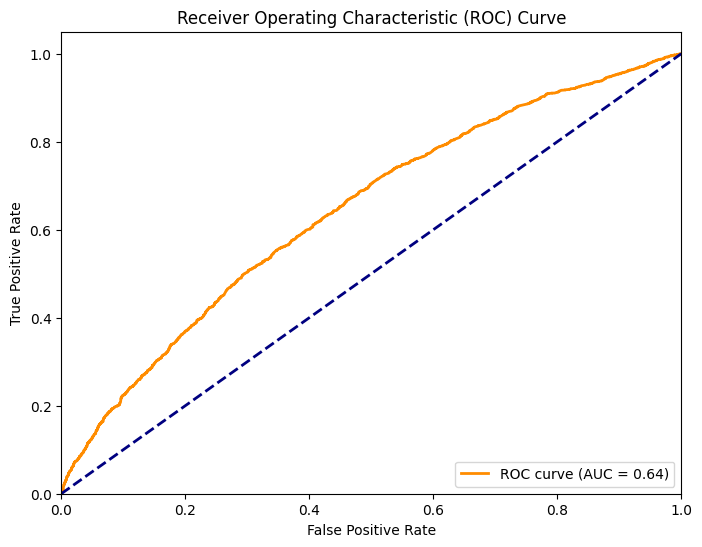

In [32]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Evaluating classification metrics with varying thresholds for the tuned MLP classifier

In [33]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_thresholded)
    precision = precision_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)
    f1 = f1_score(y_test, y_pred_thresholded)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Threshold: {threshold:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {roc_auc:.2f}")
    print()


Threshold: 0.10
Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1-Score: 0.76
AUC-ROC: 0.64

Threshold: 0.20
Accuracy: 0.62
Precision: 0.62
Recall: 0.99
F1-Score: 0.76
AUC-ROC: 0.64

Threshold: 0.30
Accuracy: 0.63
Precision: 0.63
Recall: 0.95
F1-Score: 0.76
AUC-ROC: 0.64

Threshold: 0.40
Accuracy: 0.64
Precision: 0.66
Recall: 0.88
F1-Score: 0.75
AUC-ROC: 0.64

Threshold: 0.50
Accuracy: 0.63
Precision: 0.69
Recall: 0.74
F1-Score: 0.71
AUC-ROC: 0.64

Threshold: 0.60
Accuracy: 0.58
Precision: 0.73
Recall: 0.51
F1-Score: 0.60
AUC-ROC: 0.64

Threshold: 0.70
Accuracy: 0.50
Precision: 0.77
Recall: 0.27
F1-Score: 0.40
AUC-ROC: 0.64

Threshold: 0.80
Accuracy: 0.43
Precision: 0.81
Recall: 0.10
F1-Score: 0.17
AUC-ROC: 0.64

Threshold: 0.90
Accuracy: 0.39
Precision: 0.88
Recall: 0.02
F1-Score: 0.03
AUC-ROC: 0.64



Calculating Lift Values and Cumulative Lift Values for the tuned MLP classifier

In [34]:
lift_values = []
cumulative_lift_values = []

for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    tp = sum((y_test == 1) & (y_pred_thresholded == 1))
    overall_positive_rate = sum(y_test == 1) / len(y_test)
    tpr = tp / (sum(y_test == 1))
    lift = tpr / overall_positive_rate
    cumulative_lift = (sum(y_test == 1) / len(y_test)) / overall_positive_rate

    lift_values.append(lift)
    cumulative_lift_values.append(cumulative_lift)
    
    print(f"Threshold: {threshold:.2f}")
    print(f"Lift Value: {lift:.2f}")
    print(f"Cumulative Lift Value: {cumulative_lift:.2f}")
    print()


Threshold: 0.10
Lift Value: 1.62
Cumulative Lift Value: 1.00

Threshold: 0.20
Lift Value: 1.61
Cumulative Lift Value: 1.00

Threshold: 0.30
Lift Value: 1.55
Cumulative Lift Value: 1.00

Threshold: 0.40
Lift Value: 1.43
Cumulative Lift Value: 1.00

Threshold: 0.50
Lift Value: 1.19
Cumulative Lift Value: 1.00

Threshold: 0.60
Lift Value: 0.83
Cumulative Lift Value: 1.00

Threshold: 0.70
Lift Value: 0.43
Cumulative Lift Value: 1.00

Threshold: 0.80
Lift Value: 0.16
Cumulative Lift Value: 1.00

Threshold: 0.90
Lift Value: 0.02
Cumulative Lift Value: 1.00



Computing Youden's Index for Different Thresholds for the tuned MLP classifier

In [35]:
youden_values = []

for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    tp = sum((y_test == 1) & (y_pred_thresholded == 1))
    tn = sum((y_test == 0) & (y_pred_thresholded == 0))
    fp = sum((y_test == 0) & (y_pred_thresholded == 1))
    fn = sum((y_test == 1) & (y_pred_thresholded == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    youden_index = sensitivity + specificity - 1

    youden_values.append(youden_index)

    print(f"Threshold: {threshold:.2f}")
    print(f"Youden's Index: {youden_index:.2f}")
    print()


Threshold: 0.10
Youden's Index: 0.00

Threshold: 0.20
Youden's Index: 0.02

Threshold: 0.30
Youden's Index: 0.05

Threshold: 0.40
Youden's Index: 0.14

Threshold: 0.50
Youden's Index: 0.20

Threshold: 0.60
Youden's Index: 0.21

Threshold: 0.70
Youden's Index: 0.14

Threshold: 0.80
Youden's Index: 0.06

Threshold: 0.90
Youden's Index: 0.01

